In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import numpy as np

class Node:
    """
        A node class for A* Pathfinding
        parent is parent of the current Node
        position is current position of the Node in the maze
        g is cost from start to current Node
        h is heuristic based estimated cost for current Node to end Node
        f is total cost of present node i.e. :  f = g + h
    """

    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position

        self.g = 0
        self.h = 0
        self.f = 0
    
    def __eq__(self, other):
        return self.position == other.position

#This function return the path of the search
def return_path(current_node,maze):
    path = []
    no_rows, no_columns = np.shape(maze)
    # here we create the initialized result maze with -1 in every position
    result = [[-1 for i in range(no_columns)] for j in range(no_rows)]
    current = current_node
    while current is not None:
        path.append(current.position)
        current = current.parent
    # Return reversed path as we need to show from start to end path
    path = path[::-1]
    start_value = 0
    # we update the path of start to end found by A-star serch with every step incremented by 1
    for i in range(len(path)):
        result[path[i][0]][path[i][1]] = start_value
        start_value += 1
    return result


def search(maze, traffic_matrix, start, end, time_start,distance_one):
    """
        Returns a list of tuples as a path from the given start to the given end in the given maze
        :param maze:
        :param cost
        :param start:
        :param end:
        :return:
    """

    # Create start and end node with initized values for g, h and f
    start_node = Node(None, tuple(start))
    start_node.g = start_node.h = start_node.f = 0
    end_node = Node(None, tuple(end))
    end_node.g = end_node.h = end_node.f = 0
    time = time_start
    # Initialize both yet_to_visit and visited list
    # in this list we will put all node that are yet_to_visit for exploration. 
    # From here we will find the lowest cost node to expand next
    yet_to_visit_list = []  
    # in this list we will put all node those already explored so that we don't explore it again
    visited_list = [] 
    
    # Add the start node
    yet_to_visit_list.append(start_node)
    
    # Adding a stop condition. This is to avoid any infinite loop and stop 
    # execution after some reasonable number of steps
    outer_iterations = 0
    max_iterations = (len(maze) // 2) ** 10

    # what squares do we search . serarch movement is left-right-top-bottom 
    #(4 movements) from every positon

    move  =  [[-1, 0 ], # go up
              [ 0, -1], # go left
              [ 1, 0 ], # go down
              [ 0, 1 ]] # go right


    """
        1) We first get the current node by comparing all f cost and selecting the lowest cost node for further expansion
        2) Check max iteration reached or not . Set a message and stop execution
        3) Remove the selected node from yet_to_visit list and add this node to visited list
        4) Perofmr Goal test and return the path else perform below steps
        5) For selected node find out all children (use move to find children)
            a) get the current postion for the selected node (this becomes parent node for the children)
            b) check if a valid position exist (boundary will make few nodes invalid)
            c) if any node is a wall then ignore that
            d) add to valid children node list for the selected parent
            
            For all the children node
                a) if child in visited list then ignore it and try next node
                b) calculate child node g, h and f values
                c) if child in yet_to_visit list then ignore it
                d) else move the child to yet_to_visit list
    """
    #find maze has got how many rows and columns 
    no_rows, no_columns = np.shape(maze)
    t = 0
    # Loop until you find the end
    
    while len(yet_to_visit_list) > 0:
        
        # Every time any node is referred from yet_to_visit list, counter of limit operation incremented
        outer_iterations += 1    

        time = time+t
        # Get the current node
        current_node = yet_to_visit_list[0]
        current_index = 0
        for index, item in enumerate(yet_to_visit_list):
            if item.f < current_node.f:
                current_node = item
                current_index = index
        t = distance_one*traffic_matrix[current_node.position[0]][current_node.position[1]][int(time)%24]     
        # if we hit this point return the path such as it may be no solution or 
        # computation cost is too high
        if outer_iterations > max_iterations:
            print ("giving up on pathfinding too many iterations")
            return return_path(current_node,maze)

        # Pop current node out off yet_to_visit list, add to visited list
        yet_to_visit_list.pop(current_index)
        visited_list.append(current_node)

        # test if goal is reached or not, if yes then return the path
        if current_node == end_node:
            return return_path(current_node,maze)

        # Generate children from all adjacent squares
        children = []

        for new_position in move: 

            # Get node position
            node_position = (current_node.position[0] + new_position[0], current_node.position[1] + new_position[1])
            
            # Make sure within range (check if within maze boundary)
            if (node_position[0] > (no_rows - 1) or 
                node_position[0] < 0 or 
                node_position[1] > (no_columns -1) or 
                node_position[1] < 0):
                continue

            if maze[node_position[0]][node_position[1]] != 0:
                continue

            # Create new node
            new_node = Node(current_node, node_position)

            # Append
            children.append(new_node)

        # Loop through children
        for child in children:
            
            # Child is on the visited list (search entire visited list)
            if len([visited_child for visited_child in visited_list if visited_child == child]) > 0:
                continue
            
        
            # Create the f, g, and h values
            child.g = current_node.g + traffic_matrix[current_node.position[0]][current_node.position[1]][int(time)%24]
            ## Heuristic costs calculated here, this is using eucledian distance
            child.h = (((child.position[0] - end_node.position[0]) ** 2) + 
                       ((child.position[1] - end_node.position[1]) ** 2)) 

            child.f = child.g #+ child.h

            # Child is already in the yet_to_visit list and g cost is already lower
            if len([i for i in yet_to_visit_list if child == i and child.g > i.g]) > 0:
                continue

            # Add the child to the yet_to_visit list
            yet_to_visit_list.append(child)
             



In [3]:
maze = [[0,0,0,0,0,0,0],
        [0,1,0,1,0,1,0],
        [0,1,0,1,0,1,0],
        [0,1,0,1,0,1,0],
        [0,1,0,1,0,1,0],
        [0,1,0,1,0,1,0],
        [0,0,0,0,0,0,0]]

In [4]:
L =100
C =200
maze = (np.random.uniform(size=(L,C))<0.2)*1

In [5]:
maze


array([[0, 1, 0, ..., 0, 1, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 0]])

In [6]:
no_rows, no_columns = np.shape(maze)
traffic_matrix = np.zeros((no_rows,no_columns,24))
np.random.seed(19)
for i in range(no_rows):
    for j in range(no_columns):
        for k in range(24):
            if maze[i][j]==0:
                if ((k>=0) & (k<7)):
                    traffic_matrix[i][j][k] = 1/np.random.uniform(50,80)
                elif ((k>=7) & (k<10)):
                    prob = np.random.uniform(0,1)
                    if prob <= 0.65:
                        traffic_matrix[i][j][k] = 1/np.random.uniform(0.01,0.5)
                    elif (prob > 0.65) and (prob <= 1) :
                        traffic_matrix[i][j][k] = 1/np.random.uniform(80,100)
                    else:
                        traffic_matrix[i][j][k] = 1/np.random.uniform(30,60)
                elif ((k>=10) & (k<16)):
                    traffic_matrix[i][j][k] = 1/np.random.uniform(20,60)
                elif ((k>=16) & (k<21)):
                    prob = np.random.uniform(0,1)
                    if prob <= 0.65:
                        traffic_matrix[i][j][k] = 1/np.random.uniform(0.01,0.5)
                    elif (prob > 0.65) and (prob <= 0.1) :
                        traffic_matrix[i][j][k] = 1/np.random.uniform(80,100)
                    else:
                        traffic_matrix[i][j][k] = 1/np.random.uniform(80,100)
                elif ((k>=21) & (k<24)):
                    traffic_matrix[i][j][k] = 1/np.random.uniform(30,60)

In [7]:
if __name__ == '__main__':
    start = [0,70] # starting position
    end = [55,63] # ending position
    cost = 1 # cost per movement
    Distance = 1
    time_start = 7
    path = search(maze,traffic_matrix, start, end,time_start, Distance)
    print(path)

[[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

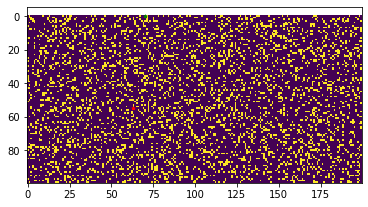

In [8]:
plt.imshow(maze)
plt.scatter(start[1],start[0], marker = "*", color = "green", s = 10)
plt.scatter(end[1],end[0], marker = "*", color = "red", s = 10)
plt.show()

In [9]:
print('\n'.join([''.join(["{:" ">3d}".format(item) for item in row]) 
      for row in path]))

 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  5  4  3  2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1

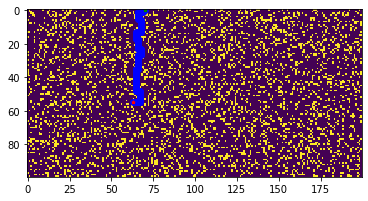

In [10]:
x = []
y = []
for i in range(no_rows):
    for j in range (no_columns):
        if (path[i][j] != -1):
            plt.scatter(j,i, color = "blue")
            prev_i = i
            prev_j = j
            
plt.scatter(start[1],start[0], marker = "*", color = "green", s = 10)
plt.scatter(end[1],end[0], marker = "*", color = "red", s = 10)         
plt.imshow(maze)
plt.show()       